In [1]:
import ctypes, multiprocessing
import numpy as np
import popeye.og as og
import popeye.utilities as utils
from popeye.visual_stimulus import VisualStimulus, simulate_bar_stimulus
from popeye import css

ModuleNotFoundError: No module named 'numpy'

In [2]:
### STIMULUS
## create sweeping bar stimulus
sweeps = np.array([-1,0,-1,90,-1,180,-1,270,-1]) # in degrees, -1 is a blank block
bar = simulate_bar_stimulus(500, 500, 40, 20, sweeps, 30, 30, 10)

In [3]:
## create an instance of the Stimulus class
stimulus = VisualStimulus(bar, 50, 25, 0.25, 1.0, ctypes.c_int16)

In [25]:
stimulus.ppd

17.811033313241005

In [4]:
### MODEL
## initialize the gaussian model
model = css.CompressiveSpatialSummationModel(stimulus, utils.double_gamma_hrf)

In [5]:
## generate a random pRF estimate
x = -5.24
y = 2.58
sigma = 1.24
n = 1.2
beta = 0.55
baseline = -0.88

In [6]:
model.hrf_delay = -0.25

In [7]:
## create the time-series for the invented pRF estimate
data = model.generate_prediction(x, y, sigma, n, beta, baseline)

In [8]:
data

array([-1.43      , -1.43      , -1.43      , -1.43      , -1.43      ,
       -1.43      , -1.43      , -1.43      , -1.43      , -1.43      ,
       -1.43      , -1.43      , -1.43      , -1.43      , -1.43      ,
       -1.43      , -1.43      , -1.43      , -1.43      , -1.43      ,
       -1.43      , -1.43      , -1.43      , -1.43      , -1.43      ,
       -1.43      , -1.43      , -1.43      , -1.43      , -1.43      ,
       -1.43      , -1.42991573, -1.42866971, -1.42085473, -1.38675384,
       -1.27297745, -0.97551747, -0.35742026,  0.67523349,  2.07215859,
        3.58541777,  4.83545363,  5.47384425,  5.33983963,  4.51426117,
        3.24818044,  1.83240853,  0.49497943, -0.63464747, -1.51009622,
       -2.13523677, -2.53719199, -2.75149549, -2.81607371, -2.76893671,
       -2.64641886, -2.48111979, -2.29996204, -2.1229972 , -1.96326137,
       -1.82757074, -1.71789997, -1.63293755, -1.56950465, -1.52365496,
       -1.49141666, -1.4692366 , -1.4542233 , -1.44423017, -1.43

In [9]:
data.shape

(270,)

In [10]:
## add in some noise
data += np.random.uniform(-data.max()/10,data.max()/10,len(data))

In [11]:
data

array([-1.32773004, -1.21721726, -1.47375855, -1.81109291, -1.81923037,
       -1.9199178 , -1.42032289, -1.31989756, -1.68299171, -1.53428894,
       -1.22485668, -1.80432638, -1.2032887 , -1.24479086, -1.71090977,
       -0.97998217, -1.01522128, -1.03059439, -1.38834361, -1.51919571,
       -1.15934396, -1.81339746, -1.17528229, -1.48110345, -1.95074475,
       -1.91485583, -1.86119065, -1.93344084, -1.77198898, -1.30733212,
       -1.48238666, -1.31341791, -1.04658639, -1.84052109, -1.77988937,
       -0.97494177, -0.63069318,  0.14901453,  0.81027593,  1.61749809,
        4.11873395,  5.32186788,  5.1102549 ,  5.75279226,  4.00646729,
        3.52644821,  1.34420393,  0.11216367, -0.83227879, -1.17634178,
       -1.83084192, -3.06743002, -2.3208883 , -3.14165178, -2.23360816,
       -3.15597312, -2.13833518, -2.51657213, -1.78597941, -1.81635641,
       -1.79567572, -2.24296788, -1.99107923, -1.26715367, -1.25705329,
       -1.35879882, -1.62758085, -1.93550499, -0.96839038, -1.88

In [12]:
data.shape

(270,)

In [13]:
### FIT
## define search grids
# these define min and max of the edge of the initial brute-force search.
x_grid = (-10, 10)
y_grid = (-10, 10)
s_grid = (0.25, 12)
n_grid = (.1, 4) #exponent


In [ ]:
x = -5.24
y = 2.58
sigma = 1.24
n = 1.2
beta = 0.55

In [14]:
## define search bounds
# these define the boundaries of the final gradient-descent search.
x_bound = (-12.0, 12.0)
y_bound = (-12.0,12.0)
s_bound = (1/stimulus.ppd, 12.0) #smallest sigma is a pixel
b_bound = (1e-8,None)
u_bound = (None,None)
n_bound = (1e-1, 4.0)

In [15]:
## package the grids and bounds
grids = (x_grid, y_grid, s_grid, n_grid)
bounds = (x_bound, y_bound, s_bound, n_bound, b_bound, u_bound,)

In [16]:
## fit the response
# auto_fit = True fits the model on assignment
# verbose = 0 is silent
# verbose = 1 is a single print
# verbose = 2 is very verbose
fit = css.CompressiveSpatialSummationFit(model, data, grids, bounds, Ns=3, voxel_index=(1,2,3), auto_fit=True,verbose=2)

The gridfit solution was [-10.           0.          12.           4.           0.66435534
  -0.88586502], starting gradient descent ...
VOXEL=(001,002,003)   TIMEMS=68240   RSQ=0.97  EST=[ 2.6791  5.9215  1.2429  2.2248  0.5444 -0.8859]


In [17]:
print(fit)

In [18]:
fit

In [20]:
fit.ballpark

array([-10.        ,   0.        ,  12.        ,   4.        ,
         0.66435534,  -0.88586502])

In [26]:
temp = fit.estimate

In [27]:
temp

array([-5.29937977,  2.64212083,  1.85381266,  2.22475528,  0.54438224,
       -0.88586339])

In [29]:
fit_x = temp[0]
fit_y = temp[1]
fit_sigma = temp[2]
fit_n =  temp[3]
fit_beta = temp[4]
fit_baseline = temp[5]

In [30]:
print("x: ", x, "Fit x: ", fit_x)
print("y: ", y, "Fit y: ", fit_y)
print("sigma: ", x, "Fit sigma: ", fit_sigma)
print("n: ", n, "Fit n: ", fit_n)
print("beta: ", beta, "Fit beta: ", fit_beta)
print("baseline: ", baseline, "Fit baseline: ", fit_baseline)

x:  -5.24 Fit x:  -5.299379770859674
y:  2.58 Fit y:  2.642120834360392
sigma:  -5.24 Fit sigma:  1.8538126617260344
n:  1.2 Fit n:  2.2247552829358783
beta:  0.55 Fit beta:  0.5443822416005285
baseline:  -0.88 Fit baseline:  -0.8858633947670347


In [22]:
fit.prediction

array([-1.43024564, -1.43024564, -1.43024564, -1.43024564, -1.43024564,
       -1.43024564, -1.43024564, -1.43024564, -1.43024564, -1.43024564,
       -1.43024564, -1.43024564, -1.43024564, -1.43024564, -1.43024564,
       -1.43024564, -1.43024564, -1.43024564, -1.43024564, -1.43024564,
       -1.43024564, -1.43024564, -1.43024564, -1.43024564, -1.43024564,
       -1.43024564, -1.43024564, -1.43024564, -1.43024564, -1.43024564,
       -1.43024564, -1.4301195 , -1.42837471, -1.41855976, -1.37960906,
       -1.25768497, -0.94981463, -0.31913097,  0.73130761,  2.15402912,
        3.684075  ,  4.91351091,  5.48759949,  5.27067567,  4.37854121,
        3.08204099,  1.67033553,  0.35812221, -0.73870918, -1.58225792,
       -2.17990765, -2.55948759, -2.7562689 , -2.80781293, -2.75181266,
       -2.62421067, -2.45703656, -2.27647524, -2.10177065, -1.94520082,
       -1.81296428, -1.70660003, -1.62453858, -1.5634898 , -1.5194992 ,
       -1.48864982, -1.46747026, -1.45315011, -1.44361926, -1.43

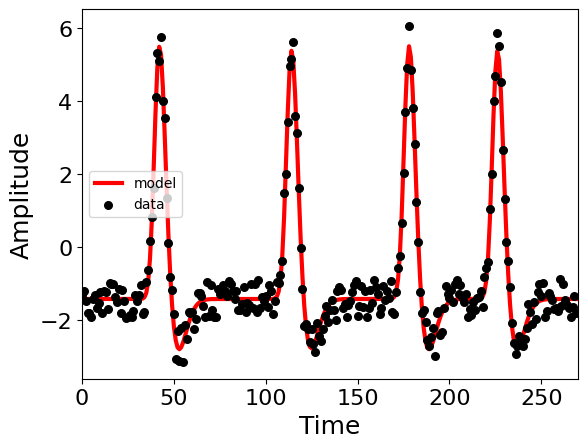

In [23]:
import matplotlib.pyplot as plt
plt.plot(fit.prediction,c='r',lw=3,label='model',zorder=1)
plt.scatter(range(len(fit.data)),fit.data,s=30,c='k',label='data',zorder=2)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Time',fontsize=18)
plt.ylabel('Amplitude',fontsize=18)
plt.xlim(0,len(fit.data))
plt.legend(loc=0)

In [24]:
fit.data

array([-1.32773004, -1.21721726, -1.47375855, -1.81109291, -1.81923037,
       -1.9199178 , -1.42032289, -1.31989756, -1.68299171, -1.53428894,
       -1.22485668, -1.80432638, -1.2032887 , -1.24479086, -1.71090977,
       -0.97998217, -1.01522128, -1.03059439, -1.38834361, -1.51919571,
       -1.15934396, -1.81339746, -1.17528229, -1.48110345, -1.95074475,
       -1.91485583, -1.86119065, -1.93344084, -1.77198898, -1.30733212,
       -1.48238666, -1.31341791, -1.04658639, -1.84052109, -1.77988937,
       -0.97494177, -0.63069318,  0.14901453,  0.81027593,  1.61749809,
        4.11873395,  5.32186788,  5.1102549 ,  5.75279226,  4.00646729,
        3.52644821,  1.34420393,  0.11216367, -0.83227879, -1.17634178,
       -1.83084192, -3.06743002, -2.3208883 , -3.14165178, -2.23360816,
       -3.15597312, -2.13833518, -2.51657213, -1.78597941, -1.81635641,
       -1.79567572, -2.24296788, -1.99107923, -1.26715367, -1.25705329,
       -1.35879882, -1.62758085, -1.93550499, -0.96839038, -1.88